<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import function as fn

# Загрузка тренировочных данных данных

In [3]:
data = pd.read_parquet('data/input/data_fusion_train.parquet')
print(f"Всего строк в наборе: {data.shape[0]}")
train = data[data.category_id != -1]

Всего строк в наборе: 26094077


In [4]:
ser_too_exl = train['item_name']
ser_too_exl.index = train.receipt_id
ser_too_exl.drop_duplicates().to_excel('Для ручной разметки.xlsx')

In [5]:
train.head()

,receipt_id,receipt_dayofweek,receipt_time,item_name,item_quantity,item_price,item_nds_rate,category_id,brands
1,11,6,20:34,"Молоко 3,2%,шт",2.0,8,2,78,None
3,39,4,11:28,"Компот из изюма, 114 ккал",1.0,4,1,71,None
4,39,4,11:28,"Макаронные изделия отварные (масло сливочное),...",1.0,4,1,71,None
17,56,5,11:42,Кофе Капучино Большой Эден 18,1.0,12,1,70,None
40,105,3,01:53,Хлеб на СЫВОРОТКЕ 350г,1.0,7,-1,84,None


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6483226 entries, 1 to 45729281
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   receipt_id         int64  
 1   receipt_dayofweek  int32  
 2   receipt_time       object 
 3   item_name          object 
 4   item_quantity      float64
 5   item_price         int64  
 6   item_nds_rate      int32  
 7   category_id        int64  
 8   brands             object 
dtypes: float64(1), int32(2), int64(3), object(3)
memory usage: 445.2+ MB


# Сводные данные

In [7]:
# Общее число записей
count = train.shape[0]
count

6483226

<ipython-input-15-53ff1ac120bc>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  train_test_sum = pd.Series()


array([<AxesSubplot:ylabel='None'>], dtype=object)

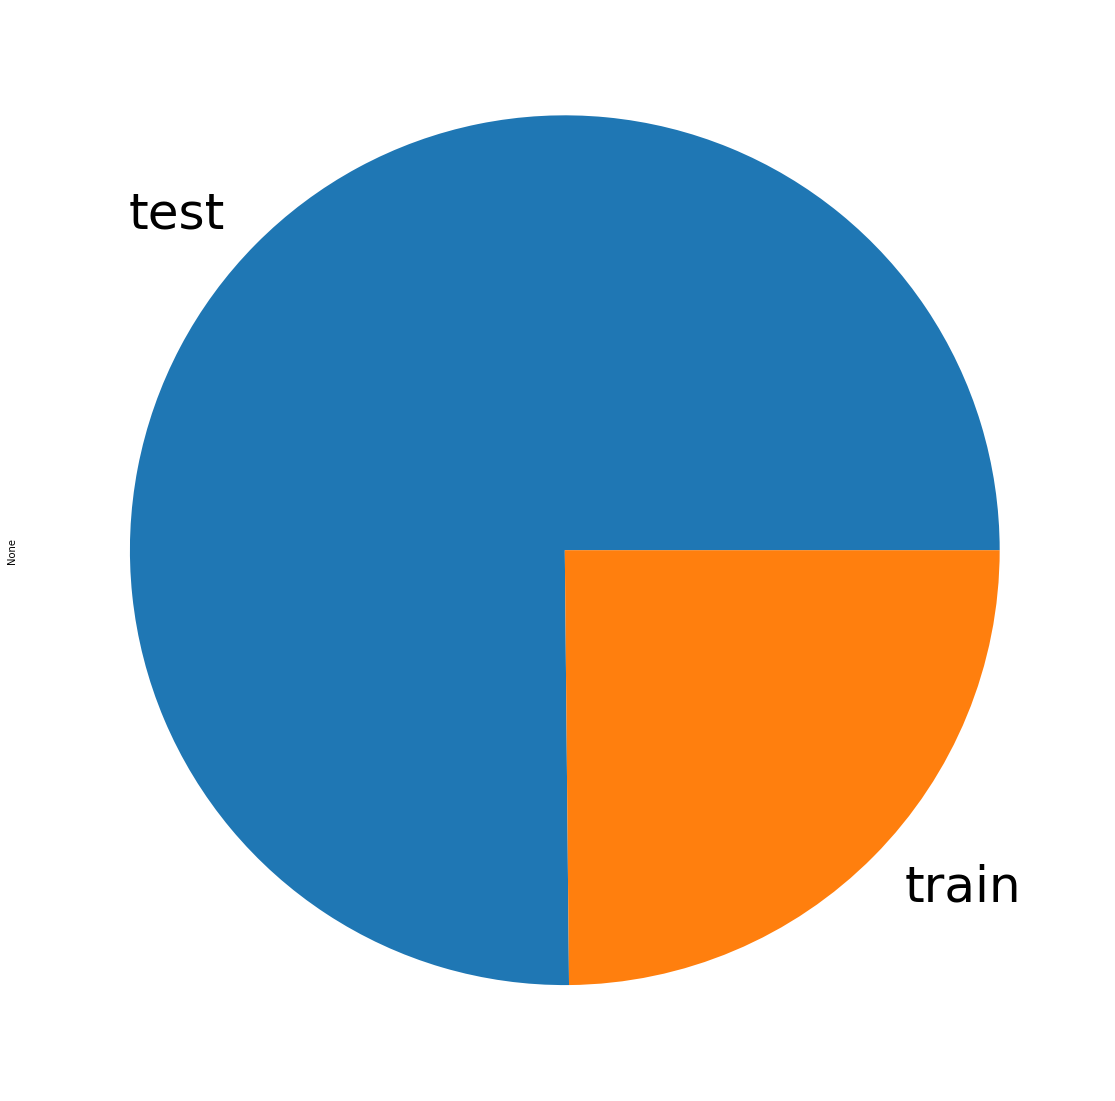

In [15]:
train_test_sum = pd.Series()
train_test_sum['test'] = data.category_id[data.category_id == -1].count()
train_test_sum['train'] = data.category_id.count() - train_test_sum['test']
train_test_sum.plot.pie(subplots=True, fontsize=50, figsize=(20, 20))

# Распределение данных по классам

In [17]:
# Популярные категории
print(f"Всего {train['category_id'].value_counts().count()} категорий")
Pie_plot_ser = train['category_id'].value_counts()
Pie_plot_ser = Pie_plot_ser/Pie_plot_ser.sum()*100
min_v = 0.4
rare_clas_ser = Pie_plot_ser[Pie_plot_ser < min_v]
Pie_plot_ser = Pie_plot_ser[Pie_plot_ser >= min_v]
Pie_plot_ser['Редкие'] = rare_clas_ser.sum()
Pie_plot_ser

Всего 98 категорий


203       20.163727
84        13.920647
80        10.347210
78         7.761553
71         6.510416
83         4.976782
77         2.982605
69         2.873755
204        2.101901
79         1.956387
38         1.949801
74         1.567861
70         1.457330
81         1.441258
0          1.423365
40         1.363935
73         1.359215
130        1.242684
76         1.241296
139        1.109124
75         1.064347
85         1.048259
145        0.992793
117        0.853341
82         0.701934
92         0.642103
61         0.614216
68         0.463920
51         0.411678
Редкие     5.456558
Name: category_id, dtype: float64

array([<AxesSubplot:ylabel='category_id'>], dtype=object)

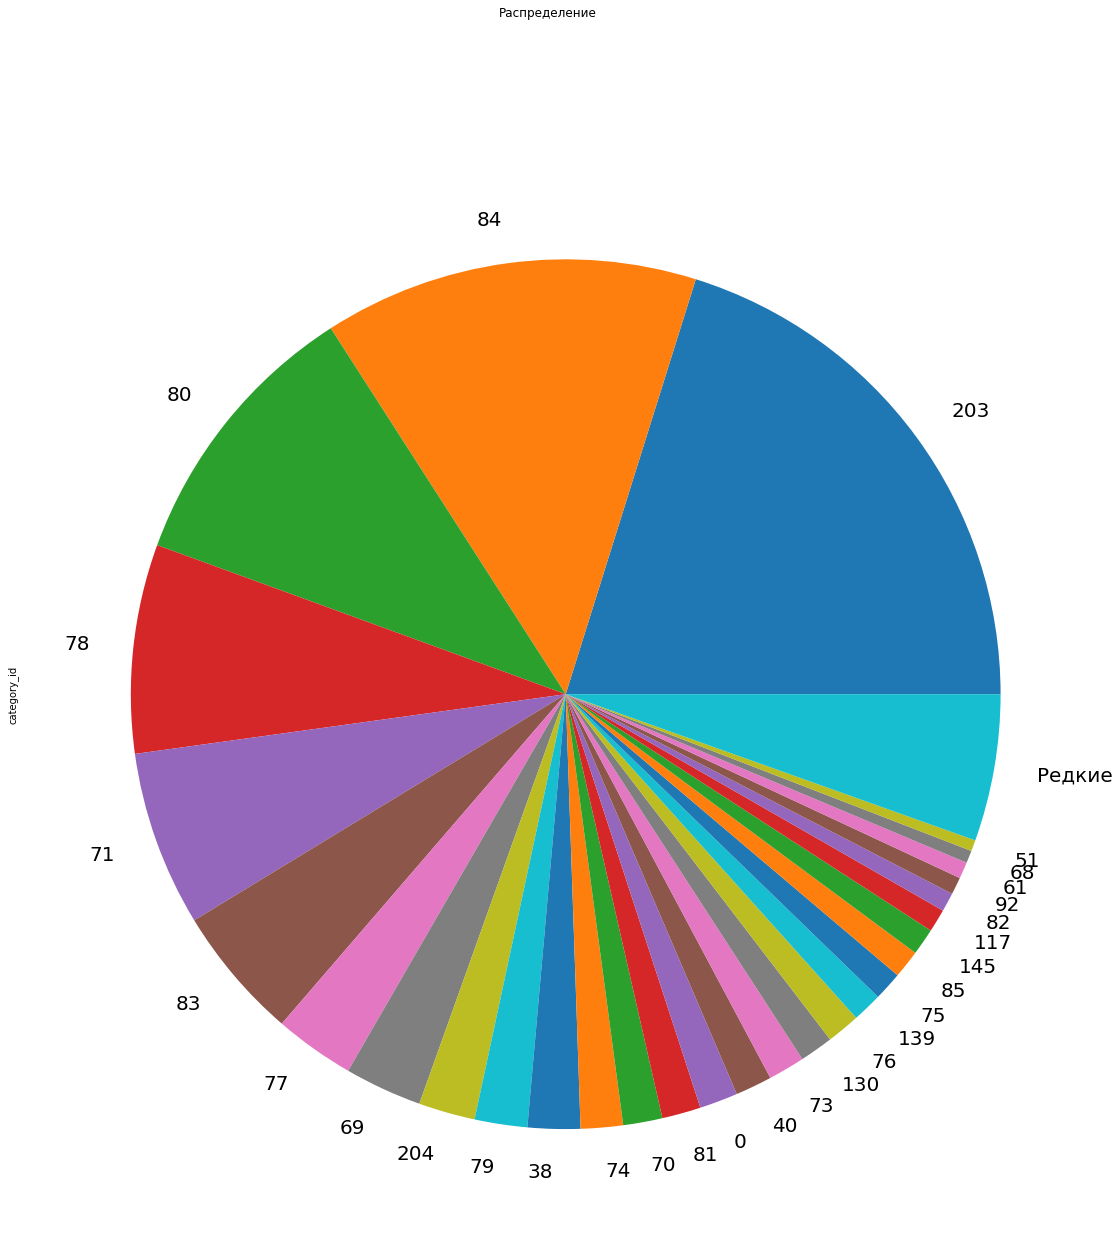

In [18]:
Pie_plot_ser.plot.pie(subplots=True, fontsize=20, figsize=(20, 20), title = 'Распределение')

In [56]:
rare_clas_ser

72     0.383528
67     0.335065
7      0.273876
30     0.264806
66     0.259485
         ...   
106    0.002823
97     0.001681
46     0.001033
143    0.000386
121    0.000015
Name: category_id, Length: 69, dtype: float64

array([<AxesSubplot:ylabel='category_id'>], dtype=object)

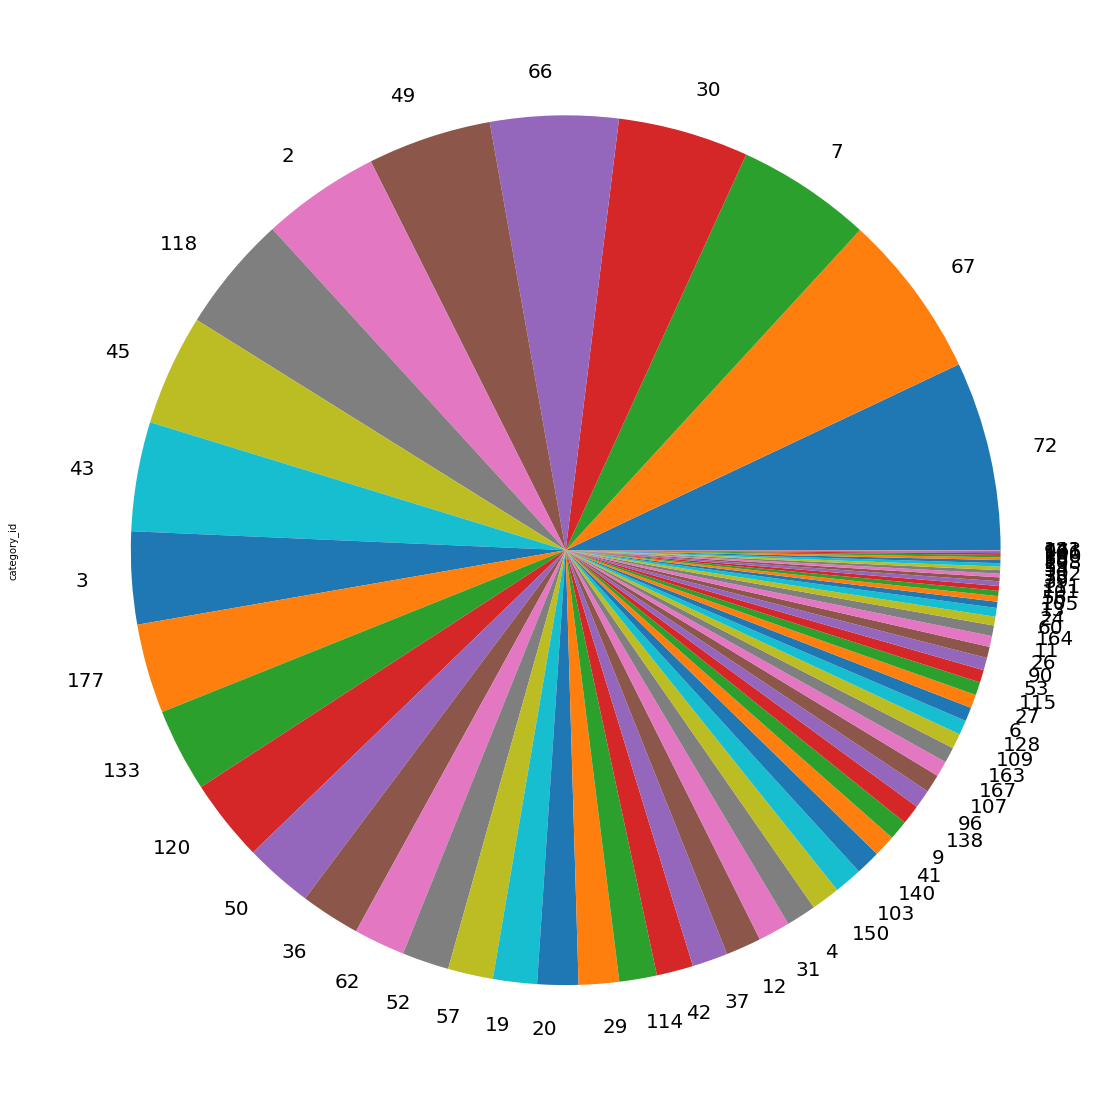

In [57]:
rare_clas_ser.plot.pie(subplots=True, fontsize=20, figsize=(20, 20))

In [88]:
# Популярные Бренды
print(f"Всего {train['brands'].value_counts().count()} Брендов")
brands_serias = np.round(train['brands'].value_counts()/count, 6) * 100
brands_serias

Всего 2624 Брендов


кока-кола     0.8274
орбит         0.4102
пепси         0.2143
пепси-кола    0.1690
вискас        0.1414
               ...  
makita        0.0000
teatone       0.0000
рототайка     0.0000
tonymoly      0.0000
simba         0.0000
Name: brands, Length: 2624, dtype: float64

# Выделение количества и единицы измерения

In [89]:
item_name_col_df = train[['item_name']].drop_duplicates()
item_name_col_df.item_name = item_name_col_df.item_name.str.lower()
item_name_col_df

,item_name
1,"молоко 3,2%,шт"
3,"компот из изюма, 114 ккал"
4,"макаронные изделия отварные (масло сливочное),..."
17,кофе капучино большой эден 18
40,хлеб на сыворотке 350г
...,...
45669181,"напиток энерг. ред булл 0,355л"
45681543,хеменгуэй дайкири
45690702,"пиво светлое ""халзан"" 4,5 % об, пл/б. 1,5 л(шт)"
45692298,экспресс педикюр


In [90]:
item_name_col_df_trnsform = fn.add_ed_izm(item_name_col_df)
item_name_col_df_trnsform['item_name_old'] = item_name_col_df['item_name']
item_name_col_df_trnsform

,item_name,ed_izm,col,item_name_old
1,"молоко 3,2%,шт",NaN,NaN,"молоко 3,2%,шт"
3,"компот из изюма, 114 ккал",NaN,NaN,"компот из изюма, 114 ккал"
4,"макаронные изделия отварные (масло сливочное),...",NaN,NaN,"макаронные изделия отварные (масло сливочное),..."
17,кофе капучино большой эден 18,NaN,NaN,кофе капучино большой эден 18
40,хлеб на сыворотке,gram,0.350,хлеб на сыворотке 350г
...,...,...,...,...
45669181,напиток энерг. ред булл,litr,355.000,"напиток энерг. ред булл 0,355л"
45681543,хеменгуэй дайкири,NaN,NaN,хеменгуэй дайкири
45690702,"пиво светлое ""халзан"" 4,5 % об, пл/б. (шт)",litr,15.000,"пиво светлое ""халзан"" 4,5 % об, пл/б. 1,5 л(шт)"
45692298,экспресс педикюр,NaN,NaN,экспресс педикюр
